In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

%matplotlib inline

In [53]:
df = pd.read_csv('train.csv', encoding='big5')

In [54]:
df.head(20)

,日期,測站,測項,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,2014/1/1,豐原,AMB_TEMP,14,14,14,13,12,12,12,...,22,22,21,19,17,16,15,15,15,15
1,2014/1/1,豐原,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,2014/1/1,豐原,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,2014/1/1,豐原,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,...,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
4,2014/1/1,豐原,NO,0.9,0.6,0.5,1.7,1.8,1.5,1.9,...,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5
5,2014/1/1,豐原,NO2,16,9.2,8.2,6.9,6.8,3.8,6.9,...,11,11,22,28,19,12,8.1,7,6.9,6
6,2014/1/1,豐原,NOx,17,9.8,8.7,8.6,8.5,5.3,8.8,...,14,13,25,30,21,13,9.7,8.6,8.7,7.5
7,2014/1/1,豐原,O3,16,30,27,23,24,28,24,...,65,64,51,34,33,34,37,38,38,36
8,2014/1/1,豐原,PM10,56,50,48,35,25,12,4,...,52,51,66,85,85,63,46,36,42,42
9,2014/1/1,豐原,PM2.5,26,39,36,35,31,28,25,...,36,45,42,49,45,44,41,30,24,13


In [55]:
df = df.iloc[:, 3:]
df[df == "NR"] = 0
raw_data = df.to_numpy()

In [56]:
month_data = {}

for month in range(12):
    sample = np.empty([18, 20 * 24])
    for day in range(20):
        sample[:, day * 24 : (day + 1) * 24] = raw_data[18 * (month * 20 + day) : 18 * (month * 20 + day + 1), :]
    month_data[month] = sample

In [157]:
month_data_pm = {}

for month in range(12):
    sample = np.empty([1, 20 *24])
    for day in range(20):
        sample[:, day * 24 : (day + 1) * 24] = raw_data[18 * (month * 20 + day) + 9, :]
    month_data_pm[month] = sample

In [166]:
month_data_pm[0].shape

(1, 480)

### 計算 18 個特徵

In [158]:
# 計算每 5 個小時為一組
x_fiv = np.empty([475 * 12, 18 * 5])
y_fiv = np.empty([475 * 12, 1])

for month in range(12):
    for day in range(20):
        for hour in range(24):
            if day == 19 and hour > 14:
                continue
            x_fiv[month * 475 + day * 24 + hour, :] = month_data[month][:, day * 24 + hour : day * 24 + hour + 5].reshape(1, -1)
            y_fiv[month * 475 + day * 24 + hour, :] = month_data[month][9, day * 24 + hour + 5]

In [57]:
# 計算每 9 個小時為一組
x = np.empty([471 * 12, 18 * 9])
y = np.empty([471 * 12, 1])

for month in range(12):
    for day in range(20):
        for hour in range(24):
            if day == 19 and hour > 14:
                continue
            x[month * 471 + day * 24 + hour, :] = month_data[month][:, day * 24 + hour : day * 24 + hour + 9].reshape(1, -1)
            y[month * 471 + day * 24 + hour, :] = month_data[month][9, day * 24 + hour + 9]

### 計算 PM 2.5 一個特徵

In [168]:
# 計算每 9 個小時為一組，僅使用 PM 2.5 單一特徵
x_pm = np.empty([471 * 12, 9 * 1])
y_pm = np.empty([471 * 12, 1])

for month in range(12):
    for day in range(20):
        for hour in range(24):
            if day == 19 and hour > 14:
                continue
            x_pm[month * 471 + day * 24 + hour, :] = month_data_pm[month][:, day * 24 + hour : day * 24 + hour + 9].reshape(1, -1)
            y_pm[month * 471 + day * 24 + hour, :] = month_data_pm[month][:, day * 24 + hour + 9]

## 標準化資料

In [58]:
def Standardization(data):
    '''
    計算平均值與標準差，並最終輸出標準化後的資料，替換到原本的資料集中。
    '''
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    
    for i in range(len(data)): # X 的行數
        for j in range(len(data[0])): # X 的列數
            if std.any != 0:
                data[i][j] = (data[i][j] - mean[j]) / std[j]

In [59]:
# 把訓練集的數據標準化
Standardization(x)
Standardization(y)

# 把訓練資料分成 8:2 的訓練資料與驗證資料
import math
x_train_set = x[: math.floor(len(x) * 0.8), :]
y_train_set = y[: math.floor(len(y) * 0.8), :]
x_validation = x[math.floor(len(x) * 0.8): , :]
y_validation = y[math.floor(len(y) * 0.8): , :]

In [159]:
# 把 5 小時的資料標準化
Standardization(x_fiv)
Standardization(y_fiv)

# 把訓練資料分成 8:2 的訓練資料與驗證資料
x_fiv_train_set = x_fiv[: math.floor(len(x) * 0.8), :]
y_fiv_train_set = y_fiv[: math.floor(len(y) * 0.8), :]
x_fiv_validation = x_fiv[math.floor(len(x) * 0.8): , :]
y_fiv_validation = y_fiv[math.floor(len(y) * 0.8): , :]

In [169]:
# 把 5 小時的資料標準化
Standardization(x_pm)
Standardization(y_pm)

# 把訓練資料分成 8:2 的訓練資料與驗證資料
x_pm_train_set = x_pm[: math.floor(len(x) * 0.8), :]
y_pm_train_set = y_pm[: math.floor(len(y) * 0.8), :]
x_pm_validation = x_pm[math.floor(len(x) * 0.8): , :]
y_pm_validation = y_pm[math.floor(len(y) * 0.8): , :]

In [146]:
def Reg_model(x_data, y_data, x_validation, y_validation, learning_rate, iter_time):
    dim = len(x_data[0]) + 1
    w = np.zeros([dim, 1])
    x_ind = np.concatenate((np.ones([len(x_data), 1]), x_data), axis = 1).astype(float)
    
    # 初始化 adagrad 的參數
    adagrad = np.zeros([dim, 1])
    eps = 1 * 10 ** -10 # 極小項，避免出現分母為零的狀況
    loss_list = [] # 紀錄 Loss function 的遞迴狀況
    
    for i in range(iter_time):
        loss = np.sqrt(np.sum(np.power(np.dot(x_ind, w) - y_data, 2))/len(x_data))
        loss_list.append(loss)
        
        # adagrad 遞迴式
        gradient = gradient = 2 * np.dot(x_ind.transpose(), np.dot(x_ind, w) - y_data) #dim*1
        adagrad += gradient ** 2
        w = w - learning_rate * gradient / np.sqrt(adagrad + eps)
    
    np.save('weight_LR{0}_i{1}.npy'.format(learning_rate, iter_time), w)
    
    # 交叉驗證 Loss function
    test_x = np.concatenate((np.ones([len(x_validation), 1]), x_validation), axis = 1).astype(float)
    
    ans_y = np.dot(test_x, w)
    loss = np.sqrt(np.sum(np.power(ans_y - y_validation, 2))/len(x_validation)) #rmse
    
    # 繪圖顯示遞迴效果
    plt.plot(np.arange(1, iter_time), loss_list[1:])
    plt.ylim(0, 3)
    plt.xlim(0, iter_time)
    
    # 顯示結果
    print("Loss function of training: {}".format(loss_list[-1]))
    print("Loss function of testing:  {}".format(loss))

Loss function of training: 0.3453874167183221
Loss function of testing:  0.34175366897247156


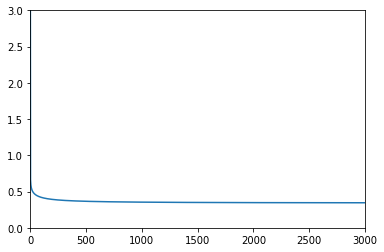

In [147]:
Reg_model(x_train_set, y_train_set, x_validation, y_validation, 0.1, 3000)

Loss function of training: 0.3457531003878947
Loss function of testing:  0.3421259511919242


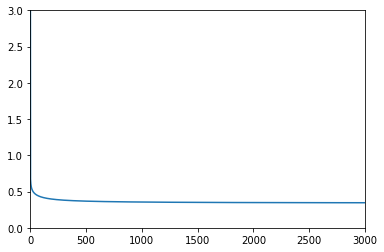

In [148]:
Reg_model(x_train_set, y_train_set, x_validation, y_validation, 1, 3000)

Loss function of training: 0.34579967936661354
Loss function of testing:  0.34218603579369555


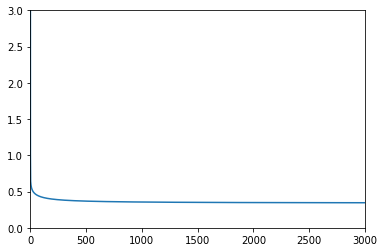

In [149]:
Reg_model(x_train_set, y_train_set, x_validation, y_validation, 5, 3000)

Loss function of training: 0.34581050807351194
Loss function of testing:  0.34220023950470535


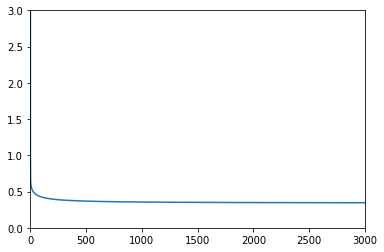

In [150]:
Reg_model(x_train_set, y_train_set, x_validation, y_validation, 50, 3000)

## 5 小時的 Loss function

Loss function of training: 0.350019572302232
Loss function of testing:  0.3387192119834031


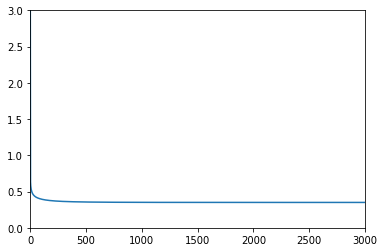

In [160]:
Reg_model(x_fiv_train_set, y_fiv_train_set, x_fiv_validation, y_fiv_validation, 0.1, 3000)

Loss function of training: 0.3499924864374308
Loss function of testing:  0.33862075832888855


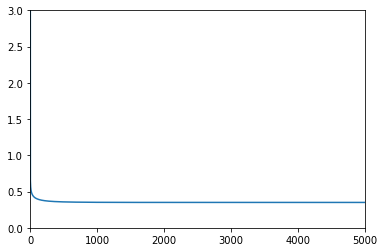

In [161]:
Reg_model(x_fiv_train_set, y_fiv_train_set, x_fiv_validation, y_fiv_validation, 1, 5000)

## 9 小時的 PM2.5 預測

Loss function of training: 0.37287393375588124
Loss function of testing:  0.35193893417615907


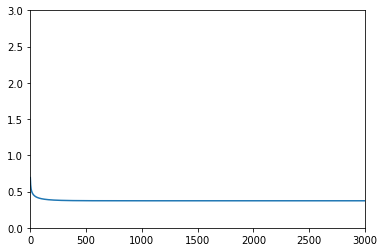

In [171]:
Reg_model(x_pm_train_set, y_pm_train_set, x_pm_validation, y_pm_validation, 0.1, 3000)

Loss function of training: 0.37287393362571625
Loss function of testing:  0.3519378079899781


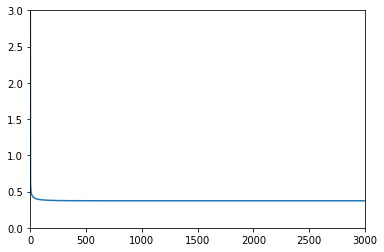

In [172]:
Reg_model(x_pm_train_set, y_pm_train_set, x_pm_validation, y_pm_validation, 0.5, 3000)